Techniques of recommendations system:
1. Collaborative filtering
2. Content Based Filtering
3. Hybrid



In [1]:
import pandas as pd
import numpy as np

In [3]:
movies_df = pd.read_csv('movies.csv', usecols=['movieId', 'title'], dtype={'movieId': 'int32', 'title': 'str'})

ratings_df = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'], dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})



In [4]:
movies_df

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [5]:
ratings_df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [19]:
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId')

In [20]:
movies_ratings_df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [22]:
movieallratings = movies_ratings_df.dropna(axis=0, subset = ['title'])

In [23]:
movieallratings

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


In [24]:
movieratingscount = (movieallratings.
                     groupby(by= ['title'])['rating'].
                     count().
                     reset_index().
                     rename(columns = {'rating': 'totalRatingCount'})
                     [['title', 'totalRatingCount']]
                    )

In [25]:
movieratingscount

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [27]:
movie_rating_total = movieallratings.merge(movieratingscount, left_on = 'title', right_on = 'title', how='left')
movie_rating_total

,movieId,title,userId,rating,totalRatingCount
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0,1
100832,193583,No Game No Life: Zero (2017),184,3.5,1
100833,193585,Flint (2017),184,3.5,1
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,1


In [29]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movieratingscount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


array([[<Axes: title={'center': 'movieId'}>,
        <Axes: title={'center': 'userId'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'totalRatingCount'}>]], dtype=object)

<Figure size 2000x1000 with 0 Axes>

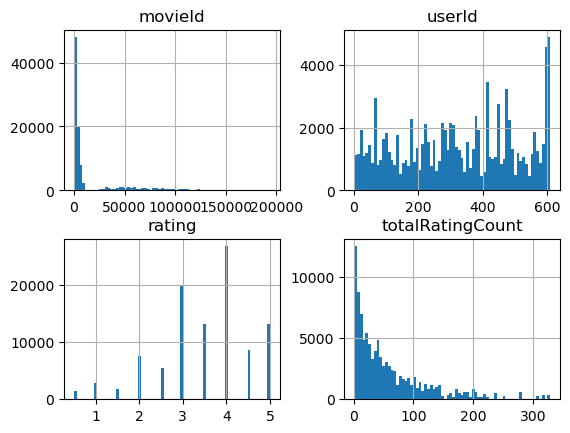

In [35]:
#histogram - ratings
import matplotlib.pyplot as plt
plt.figure(figsize= (20,10))

movie_rating_total.hist(bins=70)

In [40]:
pop_threshold = 50
rating_pop_movies = movie_rating_total.query('totalRatingCount >= @pop_threshold')
rating_pop_movies

,movieId,title,userId,rating,totalRatingCount
0,1,Toy Story (1995),1,4.000,215
1,1,Toy Story (1995),5,4.000,215
2,1,Toy Story (1995),7,4.500,215
3,1,Toy Story (1995),15,2.500,215
4,1,Toy Story (1995),17,4.500,215
...,...,...,...,...,...
98310,122904,Deadpool (2016),561,2.000,54
98311,122904,Deadpool (2016),586,4.000,54
98312,122904,Deadpool (2016),596,4.000,54
98313,122904,Deadpool (2016),599,3.500,54


In [37]:
rating_pop_movies.shape

(41362, 5)

In [41]:
#Pivot table: 
movieratingfeatures = rating_pop_movies.pivot_table(index='title', columns='userId', values='rating').fillna(0)
movieratingfeatures

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,4.000
You've Got Mail (1998),0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000
Young Frankenstein (1974),5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000


In [42]:
#table to matrix(numpy array) using scipy.sparse
from scipy.sparse import csr_matrix

movieratingmatrix = csr_matrix(movieratingfeatures.values)
movieratingmatrix

<450x606 sparse matrix of type '<class 'numpy.float32'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [43]:
#Using nearest neighbor as recommendation model
from sklearn.neighbors import NearestNeighbors #Unsupervised ML

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movieratingmatrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Cosine Similarity

sim(A, B) = cos(theta) = A.B/|A||B|

theta - Angle b/w A and B

Movie 1: Kungfu panda

movie 2 : Avengers

Pivot table- each movie has a vector

so, now 2-D vector

like (4,10) and (7,3) vectors

Will try to find angle between these 2 vectors

cos 0 = 1
cos 90 = 0


In [58]:
queryIndex = np.random.choice(movieratingfeatures.shape[0])
print(queryIndex)

257


In [60]:
dist, index = model_knn.kneighbors(movieratingfeatures.iloc[queryIndex,:].values.reshape(1,-1), n_neighbors = 6)
print(dist)
print(dist.flatten()) # reduces dimension.
print(index)

[[1.7881393e-07 4.3254071e-01 4.9990684e-01 5.0779265e-01 5.1318645e-01
  5.2585101e-01]]
[1.7881393e-07 4.3254071e-01 4.9990684e-01 5.0779265e-01 5.1318645e-01
 5.2585101e-01]
[[257  50  55 132 335 146]]


In [62]:
for i in range(0, len(dist.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movieratingfeatures.index[queryIndex]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movieratingfeatures.index[index.flatten()[i]], dist.flatten()[i]))

Recommendations for Magnolia (1999):

1: Being John Malkovich (1999), with distance of 0.4325407147407532:
2: Big Lebowski, The (1998), with distance of 0.49990683794021606:
3: Donnie Brasco (1997), with distance of 0.5077926516532898:
4: Rushmore (1998), with distance of 0.5131864547729492:
5: Eyes Wide Shut (1999), with distance of 0.5258510112762451:
